# Predicting Big Mart Sales

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('Train_UWu5bXk.csv')
test = pd.read_csv('Test_u94Q5KV.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_numeric = train.select_dtypes([np.int, np.float])

In [6]:
train_numeric.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [7]:
train_numeric.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

In [9]:
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

In [10]:
train['Outlet_Size'].fillna("Small", axis=0, inplace = True)

In [11]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [12]:
train_cat = list(train.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(train[train_cat], prefix= train_cat)

In [13]:
train.drop(train_cat, axis=1, inplace = True)
X = pd.concat([train, dummies], axis =1 )

In [14]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,14,3735.1380
1,5.92,0.019278,48.2692,4,443.4228
2,17.50,0.016760,141.6180,14,2097.2700
3,19.20,0.066132,182.0950,15,732.3800
4,8.93,0.066132,53.8614,26,994.7052


# Linear Regression

In [15]:
lreg = LinearRegression(normalize = True)

In [16]:
y = train.Item_Outlet_Sales
x = train.drop('Item_Outlet_Sales', 1)
#x = train.loc[:,['Outlet_Establishment_Year','Item_MRP']] 
#trying to predict sales based on outlet_establishment year and item mrp

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [18]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [19]:
pred = lreg.predict(x_test)

In [20]:
mse = np.mean((pred - y_test)**2)
print(mse)

1757941.0562570426


The less the mean squared error, the better the model

In [21]:
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Item_Weight,-3.756348
1,Item_Visibility,-4649.260784
2,Item_MRP,15.297618
3,Outlet_Establishment_Year,12.627147


MRP has a high coefficient which means items having higher prices have better sales.

In [22]:
lreg.score(x_test,y_test)

0.38325052974024981

scoring is based on R squared. This meand that the aforementioned variables explain 34.3 % variability in sales

Text(0.5,1,'Residual plot')

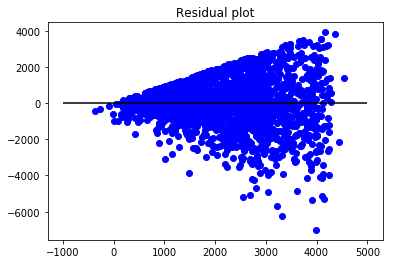

In [23]:
x_plot = plt.scatter(pred, (pred - y_test), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

# Regularization: Ridge

Performs L2 regularization (adds penalty equivalent to square of the magnitude of coefficients)
Minimization objective = LS Obj + α * (sum of square of coefficients)

In [24]:
ridgeReg = Ridge(alpha=0.05, normalize=True)

In [25]:
ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [26]:
pred_ridge = ridgeReg.predict(x_test)

In [27]:
mse = np.mean((pred_ridge - y_test)**2)
print(mse)

1766263.1928596124


In [28]:
ridgeReg.score(x_test,y_test)

0.3803308224367562

In [29]:
coeff_ridge = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(ridgeReg.coef_)
coeff

,0,Coefficient Estimate
0,Item_Weight,-3.307355
1,Item_Visibility,-4423.832581
2,Item_MRP,14.568776
3,Outlet_Establishment_Year,11.872808


# Regularization: Lasso

Performs L1 regularization (adds penalty equivalent to absolute value of the magnitude of coefficients)
Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

In [30]:
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(x_train,y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
pred_lasso = lassoReg.predict(x_test)

In [32]:
mse = np.mean((pred_lasso - y_test)**2)
mse

1763589.3815658183

In [33]:
lassoReg.score(x_test,y_test)

0.38126889239829093

In [34]:
coeff_lasso = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lassoReg.coef_)
coeff

,0,Coefficient Estimate
0,Item_Weight,-0.000000
1,Item_Visibility,-4109.323801
2,Item_MRP,14.906129
3,Outlet_Establishment_Year,9.474511


# Regularization: ElasticNet

In [35]:
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
pred_en = ENreg.predict(x_test)

In [37]:
mse = np.mean((pred_en - y_test)**2)
mse

1820359.4356486541

In [38]:
ENreg.score(x_test,y_test)

0.36135189878944096

In [39]:
coeff_en = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(ENreg.coef_)
coeff

,0,Coefficient Estimate
0,Item_Weight,-2.768755
1,Item_Visibility,-20.615071
2,Item_MRP,15.317365
3,Outlet_Establishment_Year,10.393997
